# K-means clustering

In [74]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

(300, 2)


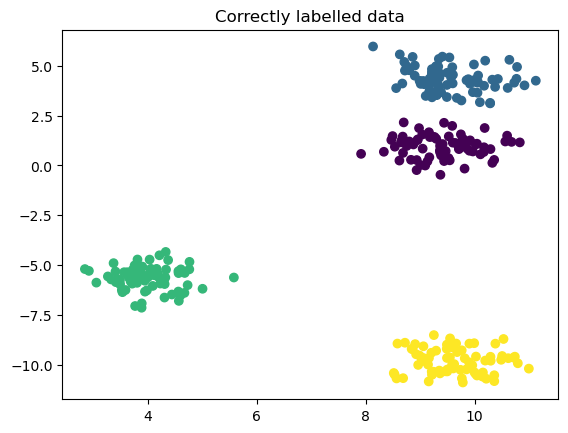

In [86]:
# Exercise 1,2
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=4)
print(X.shape)
# Plot the generated data with labels
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Correctly labelled data')
plt.show()

In [78]:
# NOT PART OF THE ASSIGNMENT
# from sklearn.cluster import KMeans
# def sklearnKmeans():
#     kmeansss = KMeans(n_clusters = 4)
#     yPrdx = kmeansss.fit_predict(X)
#     plt.scatter(X[:, 0], X[:, 1], c=yPrdx)
#     centers = kmeansss.cluster_centers_
#     print(centers)
#     plt.scatter(centers[:,0],centers[:,1],c='red',s=15) 
#     plt.show()
# sklearnKmeans()

In [121]:
# Exercise 3
def kmeansDefault(X,k, randomStateSeed = None):
    # default, random centroids initialization
    rnGen = np.random.RandomState(randomStateSeed)
    rndIndices = rnGen.choice(len(X), k, replace=False)
    centroids = X[rndIndices, :]
    # print(centroids.shape)

    # cluster array for all points
    clusters = np.zeros(len(X))

    #loop until convergence:
    while True:
        # make clusters; for each point
        distances = []
        for c in centroids:
            thisDistance = []
            # for each point:
            for x in X:
                distance = 0
                # for x1, x2 
                for i in range(len(x)):
                    distance += (x[i] - c[i])**2
                thisDistance.append(np.sqrt(distance))
            distances.append(thisDistance)

        # get min distance
        clusters = np.argmin(distances, axis=0)

        # compute new centroid
        newCentroids = []
        for i in range(k):
            arr = []
            for j in range(len(X)):
                if clusters[j]==i:
                    arr.append(X[j])
            newCentroids.append(np.mean(arr, axis=0))
        
        # check convergence
        if np.allclose(newCentroids, centroids):
            break

        centroids = newCentroids
    
    return np.array(centroids),clusters

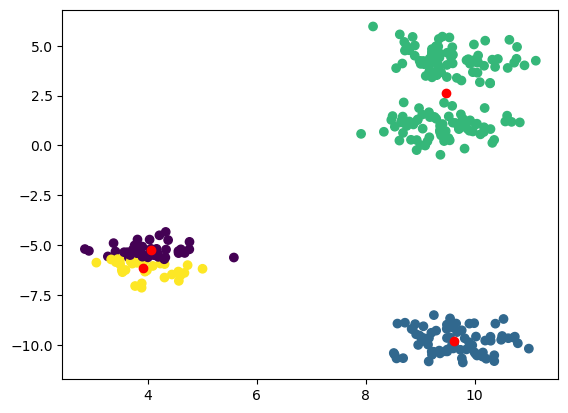

In [122]:
# Exercise 4
cx, lb = kmeansDefault(X,4)
plt.scatter(X[:,0],X[:,1],c=lb)
plt.scatter(cx[:,0],cx[:,1],c='red') 
plt.show()

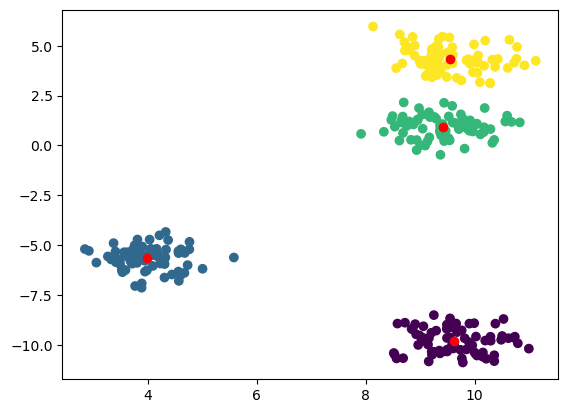

In [82]:
# Exercise 5
cx2, lb2 = kmeansDefault(X,4,randomStateSeed=2)
plt.scatter(X[:,0],X[:,1],c=lb2)
plt.scatter(cx2[:,0],cx2[:,1],c='red') 
plt.show()

### Exercise 6.

=> In the first graph the centroids are incorrect. This is because when randomly assigning initial centroids, it is possible that after kmeans algorithm when centroids converge, they do not converge correctly giving us incorrect clusters. In the second graph when seed = 2, fortunately, the centroids converged to correct positions. Using this algorithm, the centroid may or may not converge correctly.
  Nevertheless, inorder to get correct result, we can calculate the centroid for multiple random seeds and compute performance metric 'inertia' (mean squared distance between each instance and its closest centroid), and select the centroid that has the lowest inertia. 

In [125]:
# Exercise 7

def initCentroids(X,k,rs):
    # set state
    rnGen = np.random.RandomState(rs)
    
    # get the first centroid 
    centroids = []
    centroids.append(X[rnGen.choice(len(X))])

    # compute indices of other centroids that have the maximum distance from each other
    while len(centroids) < k:

        # compute distances 
        minDs = []
        for xj in X:
            minDist = float('inf')
            for c in centroids:
                # distance formula 
                dist = np.sqrt(np.sum((xj - c) ** 2))
                if dist < minDist:
                    minDist = dist
            minDs.append(minDist)
        minDs = np.array(minDs)

        
        # calculate probablities
        probs = minDs ** 2 / np.sum(minDs ** 2)
        # get the index randomly from the prob distribution that has the distribution probs
        indx = np.random.choice(len(X),p=probs)
        # add to centroid 
        centroids.append(X[indx,:])
    return centroids

def kmeansPlusPlus(X,k, randomStateSeed = None):
    # default, random centroids initialization

    centroids = initCentroids(X,k,randomStateSeed)
    # print(centroids.shape)

    # cluster array for all points
    clusters = np.zeros(len(X))

    #loop until convergence:
    while True:

        # make clusters; for each point
        distances = []
        for c in centroids:
            thisDistance = []
            # for each X :
            for x in X:
                distance = 0
                # for x1, x2 
                for i in range(len(x)):
                    distance += (x[i] - c[i])**2
                thisDistance.append(np.sqrt(distance))
            distances.append(thisDistance)

        # get min distance
        clusters = np.argmin(distances, axis=0)

        # compute new centroid
        newCentroids = []
        for i in range(k):
            arr = []
            for j in range(len(X)):
                if clusters[j]==i:
                    arr.append(X[j])
            newCentroids.append(np.mean(arr, axis=0))
        
        # check convergence
        if np.allclose(newCentroids, centroids):
            break

        centroids = newCentroids
    
    return np.array(centroids),clusters

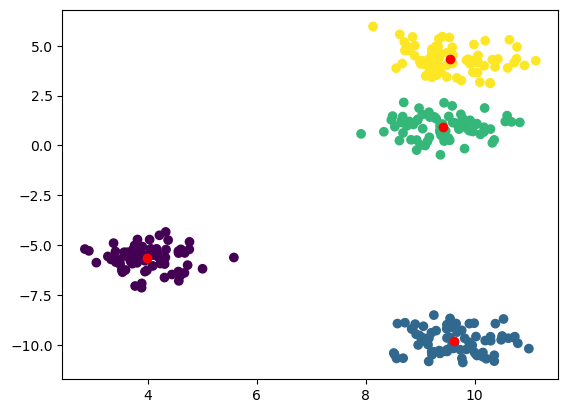

In [126]:
# Exercise 8
cx3, lb3 = kmeansPlusPlus(X,4)
plt.scatter(X[:,0],X[:,1],c=lb3)
plt.scatter(cx3[:,0],cx3[:,1],c='red') 
plt.show()

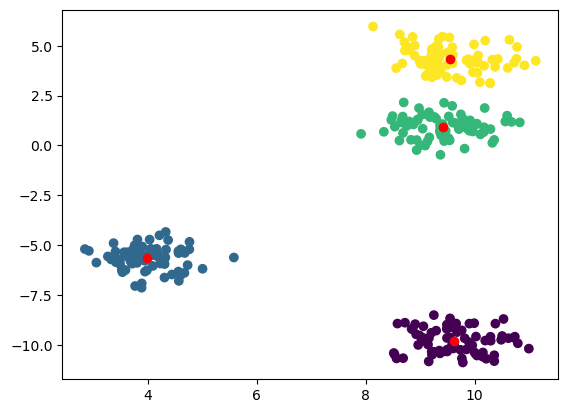

In [85]:
# Exercise 9
cx4, lb4 = kmeansDefault(X,4,randomStateSeed=2)
plt.scatter(X[:,0],X[:,1],c=lb4)
plt.scatter(cx4[:,0],cx4[:,1],c='red') 
plt.show()

### EX 9b
 The above two clusters are the same even though they had different seeds. It is because even though there is a possibility that convergence is not accurate as initial centroid is chosen randomly, most of the the time, the convergence is accurate. Hence the results above with two different seeds are the same. Again, inertia can be calculated and repeated for a multiple of random seeds to get the model with the least inertia which ensures better clustering.

### EX 10
In K-means, the initial centroids are chosen randomly from the data points which can be poor initializations. In case of poor initializations, it is possible that the model gives suboptimal solutions, as seen above in graph where centroids converged to unoptimal values. So, it is neccasary to run the algorithm several times to avoid suboptimal solutions. But in K-means++, initial centroids are chosen in a way that ensures a greater separation between them. Even though the first centroid randomly from the data points, K-means++ ensures that the initial centroids are more evenly spaced and better distributed across the data set which leads to more accurate clustering results. As we found, in K-means++, both the graphs with different seeds converged to the same optimal solution.

## Image compression

(800, 640, 3)
(512000, 3)


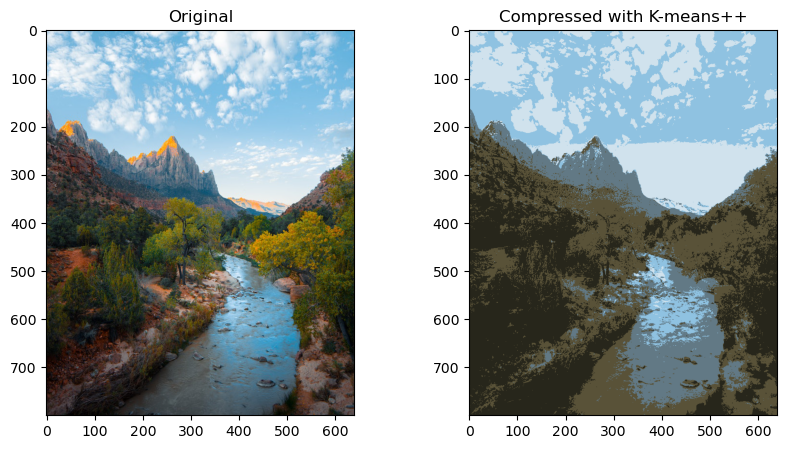

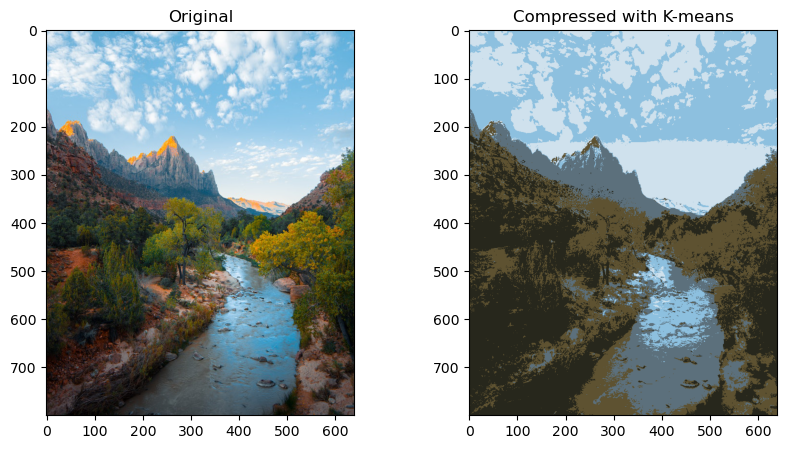

In [124]:
from PIL import Image
def showImage(imag, imgCompressed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imag)
    plt.title('Original')
    plt.subplot(1, 2, 2)
    plt.imshow(imgCompressed)
    plt.title('Compressed with '+title)
    plt.show()
    
def doImgCompression():
    im = Image.open('img.jpg')
    imArray = np.array(im)
    print(imArray.shape)
    X = imArray.reshape(-1, 3)
    X = X /256.0
    print(X.shape)
    kmeansC, kmeansL = kmeansPlusPlus(X,5)
    xCompressd = kmeansC[kmeansL]
    imCompArray = xCompressd.reshape(imArray.shape)
    imCompArray *= 256.0
    imComprsd = Image.fromarray(imCompArray.astype('uint8'),mode='RGB')
    showImage(im,imComprsd,"K-means++")
    print("\n")
    kmeansC2, kmeansL2 = kmeansDefault(X,5)
    xCompressd2 = kmeansC2[kmeansL2]
    imCompArray2 = xCompressd2.reshape(imArray.shape)
    imCompArray2 *= 256.0
    imComprsd2 = Image.fromarray(imCompArray2.astype('uint8'),mode='RGB')
    showImage(im,imComprsd2,"K-means")
    return
doImgCompression()

# Principal Component Analysis (PCA)

## Task1: Users to Movies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

(7, 5)


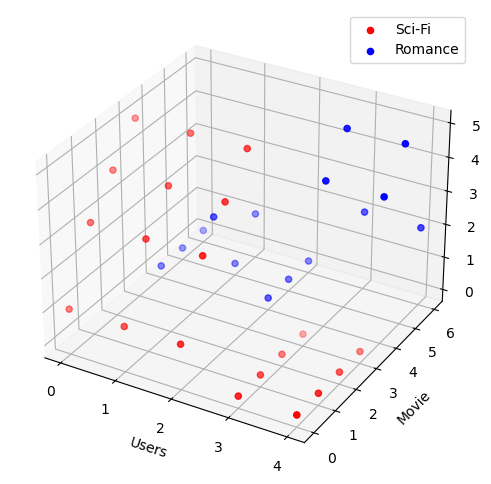

In [2]:
# Exercise 1.
X=np.array([[1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,2,0,4,4],
            [0,0,0,5,5],
            [0,1,0,2,2]])
print(X.shape)
def printGraph(X):
    fig = plt.figure(figsize=(6,6))
    # positional argument 111 and projection is 3d
    ax = fig.add_subplot(111, projection='3d')

    x, y = np.meshgrid(np.arange(X.shape[1]), np.arange(X.shape[0]))
    x = x.flatten()
    y = y.flatten()
    z = X.flatten()

    # Set the color of the points for the first four rows to red
    scifi = ax.scatter(x[:20], y[:20], z[:20], color='red')
    # Set the color of the points for the last three rows to blue
    romance = ax.scatter(x[20:], y[20:], z[20:], color='blue')
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.legend((scifi, romance), ('Sci-Fi', 'Romance'))
    ax.set_xlabel('Users')
    ax.set_ylabel('Movie')
    ax.set_zlabel('Rating')

    plt.show()
printGraph(X)

In [3]:
# Exercise 2. 
xCentered = X - np.mean(X, axis=0) # center by subtracting column means
xCentered

array([[-0.85714286, -1.28571429, -0.85714286, -1.57142857, -1.57142857],
       [ 1.14285714,  0.71428571,  1.14285714, -1.57142857, -1.57142857],
       [ 2.14285714,  1.71428571,  2.14285714, -1.57142857, -1.57142857],
       [ 3.14285714,  2.71428571,  3.14285714, -1.57142857, -1.57142857],
       [-1.85714286, -0.28571429, -1.85714286,  2.42857143,  2.42857143],
       [-1.85714286, -2.28571429, -1.85714286,  3.42857143,  3.42857143],
       [-1.85714286, -1.28571429, -1.85714286,  0.42857143,  0.42857143]])

In [4]:
# Exercise 3. 
# U = eigenvector
# S = square root of eigenvalues
# V = principal components
U, S, V = np.linalg.svd(xCentered)
print(np.around(V,decimals=6))

[[ 0.471496  0.373691  0.471496 -0.455926 -0.455926]
 [ 0.355832  0.412384  0.355832  0.536985  0.536985]
 [-0.388683  0.83084  -0.388683 -0.061466 -0.061466]
 [-0.       -0.        0.        0.707107 -0.707107]
 [-0.707107 -0.        0.707107  0.        0.      ]]


[110.092534  16.725528   1.753366   0.         0.      ]


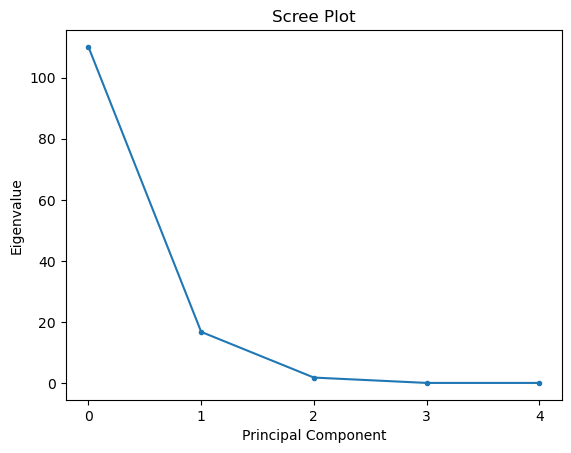

In [5]:
# Exercise 4. 
eigenVals = S * S 
print(np.around(eigenVals,decimals=6))
plt.plot(eigenVals, marker='.')
plt.xticks(np.arange(0, len(eigenVals)))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

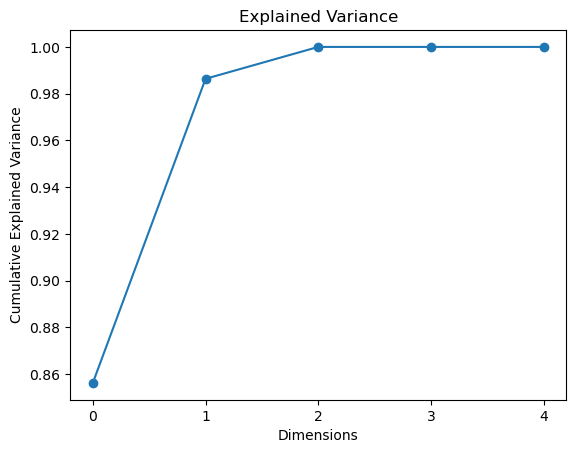

In [6]:
# plotting explained variance for determining best k 
evr = (S ** 2) / np.sum(S ** 2)
cev = np.cumsum(evr)
plt.plot(np.arange(0, len(evr)), cev, '-o')
plt.xticks(np.arange(0, len(evr)))
plt.xlabel('Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance')
plt.show()

Choice: k = 2

The idea is to keep the principal components that explain most of the variance in the data. So to choose number of dimensions to reduce to, I choose k = 2, as when number of principal components = 2, the cumulative explained variance is greater than 0.95, ie. preserving more than 95% of the variance.

Compressed data with K=2:
[[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]


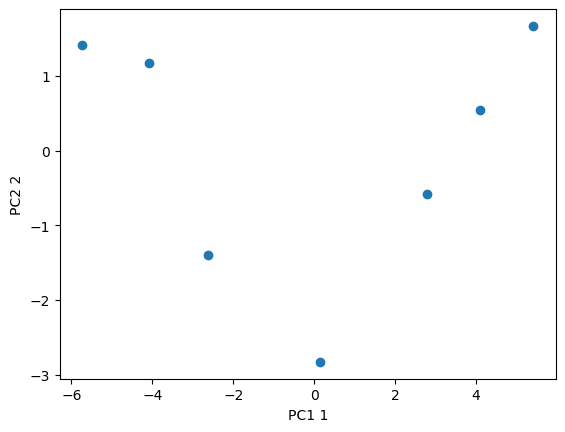

In [7]:
K = 2
xCompressed = xCentered.dot(V.T[:,:K])

# Print the compressed data
print("Compressed data with K=2:")
print(xCompressed)

# visualization
plt.scatter(xCompressed[:,0], xCompressed[:,1])
plt.xlabel("PC1 1")
plt.ylabel("PC2 2")
# Show the plot
plt.show()

In [9]:
# Exercise 6 and 7. 
eigenvalues, eigenvectors = np.linalg.eig(xCentered.T.dot(xCentered))
print("Eigenvectors:\n", np.around(eigenvectors,decimals=6))
print("Eigenvalues:\n", np.around(eigenvalues, decimals=6))

Eigenvectors:
 [[-0.471496 -0.355832  0.388683  0.148823  0.690634]
 [-0.373691 -0.412384 -0.83084   0.        0.      ]
 [-0.471496 -0.355832  0.388683 -0.148823 -0.690634]
 [ 0.455926 -0.536985  0.061466 -0.691268 -0.151741]
 [ 0.455926 -0.536985  0.061466  0.691268  0.151741]]
Eigenvalues:
 [110.092534  16.725528   1.753366   0.         0.      ]


## Task2: Human Faces

In [10]:
# Exercise 1. 

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)
faceX = lfw_people.data
print(faceX.shape)

(1288, 2914)


Num Images: 1288


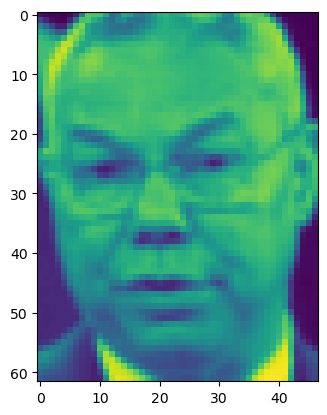

In [13]:
n, h, w = lfw_people.images.shape
print("Num Images:",n)
def showFace(X,h,w):
  plt.imshow(X.reshape(h,w))
  plt.show()

showFace(faceX[3],h,w)

(2914,)


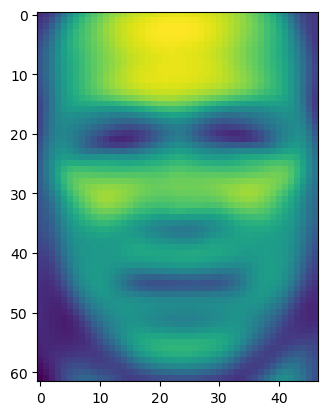

In [26]:
# Exercise 2 and 3. 
meanFace = faceX.mean(axis=0)
print(meanFace.shape)
showFace(meanFace, h, w)

In [57]:
# Exercise 4. 
def doDimRed(X,n):    
    e, v = np.linalg.eig(X.T.dot(X))
    return e[:5],v[:,:n]


In [58]:
# Exercise 5. 

# center by subtracting column means
xCenteredFace = faceX-meanFace
top5eValue, top5eVector = doDimRed(xCenteredFace,5)
print(top5eVector)
print("Top 5 eigenvalues:")
print(top5eValue)

[[ 0.00537343  0.01745991  0.01783969  0.03351924 -0.0131453 ]
 [ 0.00569514  0.01647563  0.01602544  0.03528838 -0.01357961]
 [ 0.00613803  0.01628433  0.01488798  0.03671131 -0.01403794]
 ...
 [ 0.01043273 -0.03319881  0.03723508  0.0384081   0.09058423]
 [ 0.00883074 -0.03265479  0.03316043  0.03525075  0.08371089]
 [ 0.00740469 -0.03142723  0.03093169  0.02920214  0.07456545]]
Top 5 eigenvalues:
[9.8932755e+08 7.9189363e+08 3.8294509e+08 3.1824362e+08 2.7124672e+08]


In [128]:
# Exercise 6. 
print("Values associated with 5 attributes of fourth image in dataset:", xCenteredFace[3][:5])

Values associated with 5 attributes of fourth image in dataset: [ -78.61365   -87.76084   -94.821686 -102.52334  -115.47354 ]


In [60]:
# Exercise 7. 
xProjected = xCenteredFace.dot(top5eVector)
print("Projection of fourth image:",xProjected[3])

Projection of fourth image: [-202.54218  -261.47705  -418.97418    29.398966  -39.785427]


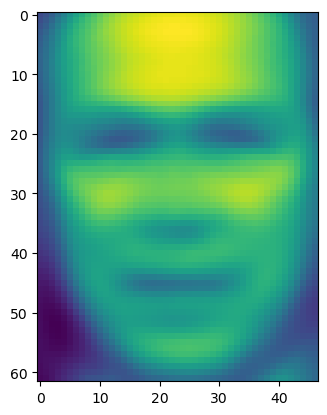

In [69]:
# Exercise 8. 
xOrig = xProjected.dot(top5eVector.T)+meanFace
showFace(xOrig[3],h,w)

Top 50 eigenvalues:
[9.8932755e+08 7.9189363e+08 3.8294509e+08 3.1824362e+08 2.7124672e+08]
Values associated with 50 attributes of fourth image in dataset: [ -78.61365   -87.76084   -94.821686 -102.52334  -115.47354  -119.0834
 -109.220406  -36.479958   29.939682   19.8667     14.419479  -14.792038
  -74.029594  -66.29631   -22.410065  -32.91066   -62.44227   -71.7228
  -58.46759   -40.37175   -23.471573  -18.000076  -29.188889  -30.36467
  -24.716003   -9.726227    4.058731    8.994522    5.304001   -2.895172
  -17.845596  -55.947227  -60.468025   -9.170349   19.119919   29.462372
   23.842957   24.578949   -4.412216  -88.44585  -120.12602  -119.67772
 -110.06646  -100.307816  -93.27067   -91.38099   -90.00777   -39.71611
  -67.25653   -92.897865]


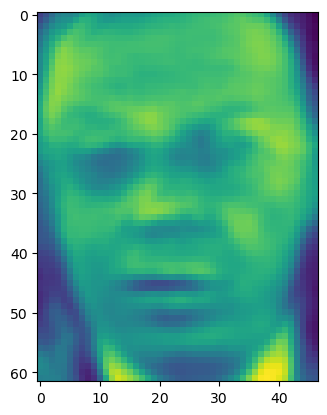

In [129]:
# Exercise 9. 
top50eValue, top50eVector = doDimRed(xCenteredFace,50)
print("Top 50 eigenvalues:")
print(top50eValue)
print("Values associated with 50 attributes of fourth image in dataset:", xCenteredFace[3][:50])
xProjected50 = xCenteredFace.dot(top50eVector)
xOrig50 = xProjected50.dot(top50eVector.T)+meanFace
showFace(xOrig50[3],h,w)
    